In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

China_Data_Frame = pd.read_csv("2020-04-21_China_Data.csv")
China_Data_Frame

,chamber,state,district,party,Twitter Handle,lastName,firstName,officialFullName,startTerm,endTerm,...,censusTotalPopulation,censusWhitePopulation,censusBlackPopulation,censusLatinoPopulation,censusAsianPacificIslanderPopulation,censusNavtiveAmericanPopulation,censusOtherPopulation,China Tweets,Polarity,Subjectivity
0,rep,AL,4.0,Republican,@Robert_Aderholt,Aderholt,Robert,Robert B. Aderholt,1/3/2019,1/3/2021,...,681487.0,578453.0,46163.0,38837.0,3200.0,5218.0,9616.0,The Chinese Communist Party has been working f...,-0.166667,0.166667
1,rep,ND,0.0,Republican,@RepArmstrongND,Armstrong,Kelly,NaN,1/3/2019,1/3/2021,...,672591.0,598007.0,7720.0,13467.0,7129.0,35562.0,10706.0,RT @GOPLeader: 𝗝𝗮𝗻 𝟯𝟭: President Trump stops f...,0.233333,0.383333
2,rep,TX,19.0,Republican,@RepArrington,Arrington,Jodey,Jodey C. Arrington,1/3/2019,1/3/2021,...,700602.0,402548.0,40888.0,237388.0,8923.0,2579.0,8276.0,RT @GOPoversight: The Chinese Communist Party ...,0.046429,0.158929
3,rep,TX,36.0,Republican,@RepBrianBabin,Babin,Brian,Brian Babin,1/3/2019,1/3/2021,...,700735.0,459185.0,63876.0,151047.0,14623.0,3111.0,8893.0,RT @Jim_Jordan: If the #WHO wants to spread Ch...,-0.030000,0.290000
4,rep,NE,2.0,Republican,@RepDonBacon,Bacon,Don,Don Bacon,1/3/2019,1/3/2021,...,609223.0,454079.0,61305.0,61976.0,15680.0,2755.0,13428.0,"ICYMI: ""Congressman Don Bacon, alongside the N...",0.083333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,rep,SC,2.0,Republican,@RepJoeWilson,Wilson,Joe,Joe Wilson,1/3/2019,1/3/2021,...,665499.0,451332.0,154392.0,34563.0,11108.0,2360.0,11744.0,China’s efforts to conceal the origin of coron...,0.400000,1.000000
167,rep,TX,6.0,Republican,@RepRonWright,Wright,Ron,NaN,1/3/2019,1/3/2021,...,694650.0,374470.0,125770.0,145387.0,33268.0,2590.0,13165.0,"On Friday, @RepChrisSmith &amp; I introduced l...",0.122222,0.416667
168,rep,FL,3.0,Republican,@RepTedYoho,Yoho,Ted,Ted S. Yoho,1/3/2019,1/3/2021,...,693992.0,487768.0,111555.0,56511.0,21708.0,2126.0,14324.0,Use of #drones has spread exponentially across...,0.105901,0.446480
169,sen,IN,NaN,Republican,@SenToddYoung,Young,Todd,Todd Young,1/3/2017,1/3/2023,...,6483802.0,5286453.0,582140.0,389707.0,103297.0,14165.0,108040.0,Need more evidence that China is trying to use...,0.025000,0.316667


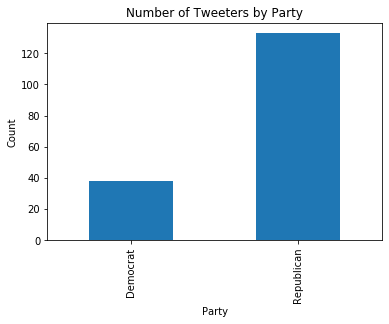

In [3]:
# histogram of frequency of tweets about China by party (whether the lawmaker tweeted about China at all)
republicans = China_Data_Frame.loc[China_Data_Frame.party == "Republican"]
democrats = China_Data_Frame.loc[China_Data_Frame.party == "Democrat"]

count_frame = China_Data_Frame.copy()
count_frame["Count"] = 1
sum_count = count_frame.groupby("party").sum()


tweeters = sum_count.plot.bar(y = "Count", title = "Number of Tweeters by Party", legend = None)
tweeters.set_xlabel("Party")
tweeters.set_ylabel("Count")

tweeters


In [4]:
by_party =  China_Data_Frame.groupby("party").mean()
by_party

,district,classSenate,2016presidentClinton,2016presidentTrump,2012presidentObama,2012presidentObama.1,2008presidentObama,2008presidentMccain,2018senateDem,2018senateRep,...,otherCitizenVotingAgePopulation,censusTotalPopulation,censusWhitePopulation,censusBlackPopulation,censusLatinoPopulation,censusAsianPacificIslanderPopulation,censusNavtiveAmericanPopulation,censusOtherPopulation,Polarity,Subjectivity
party,,,,,,,,,,,,,,,,,,,,,
Democrat,12.100000,2.000000,61.917832,32.414500,62.684377,35.429873,63.387123,34.696593,57.787592,40.276769,...,19291.315789,1.688338e+06,1.144247e+06,195758.947368,195691.894737,107921.473684,5534.368421,39184.894737,0.022456,0.283885
Republican,7.247619,2.107143,35.519365,59.214436,39.383005,58.893298,42.153289,56.390611,41.831891,55.975512,...,18841.383459,2.026301e+06,1.365435e+06,239765.338346,326204.323308,48417.834586,12771.879699,34095.766917,0.057829,0.331844


In [5]:
by_state

NameError: name 'by_state' is not defined

Text(0, 0.5, 'Polarity')

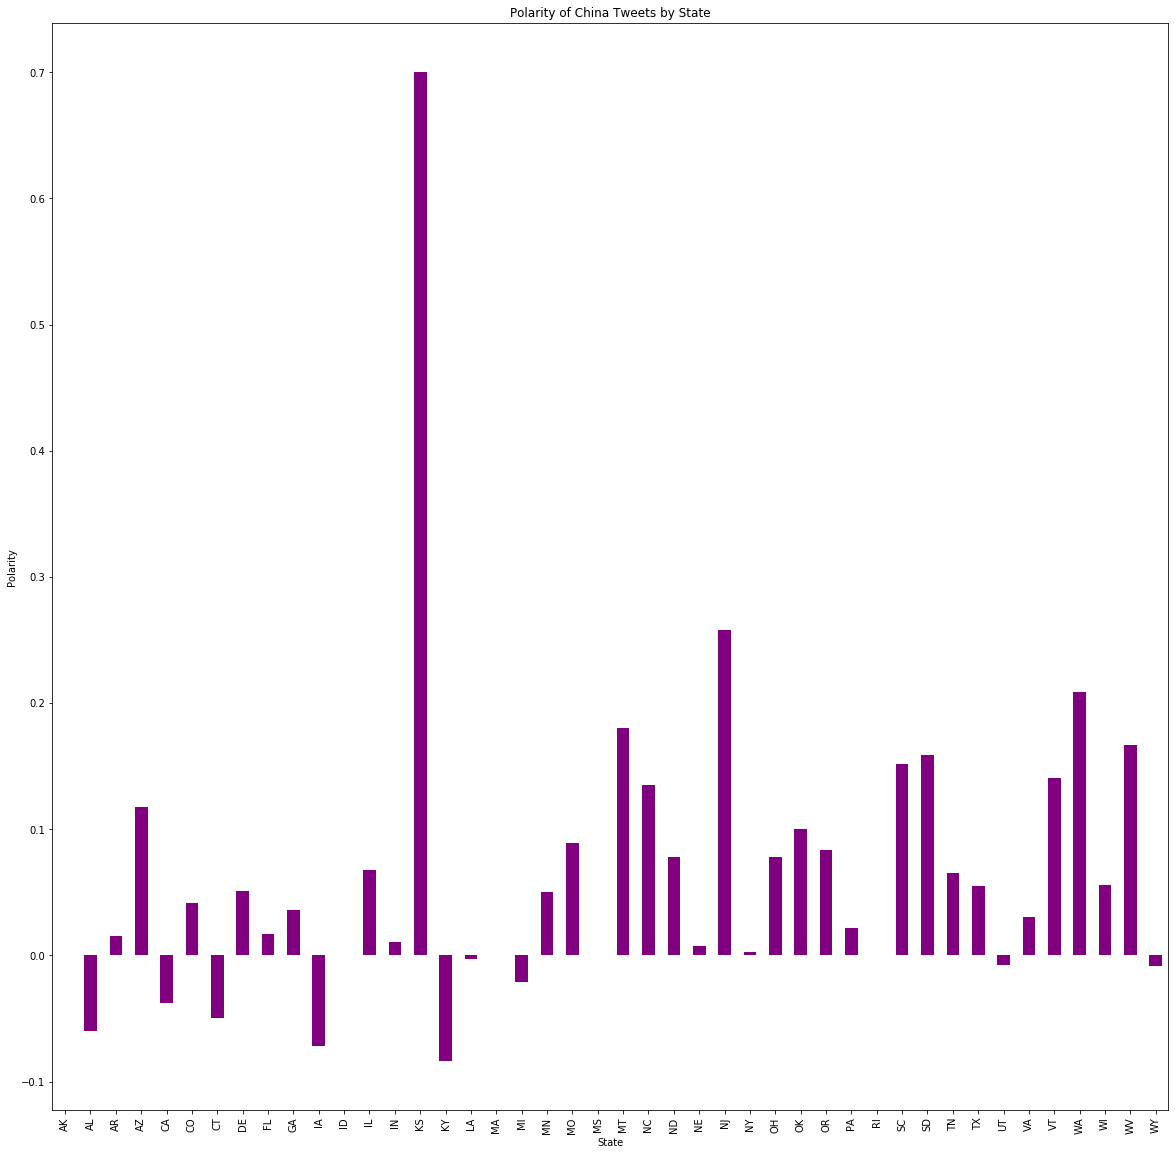

In [6]:
# average sentiment by state


by_state = China_Data_Frame.groupby("state").mean()
happy = by_state.reset_index()

state_polarity = happy.plot(kind='bar', x='state', y="Polarity", figsize = (20, 20), color = "purple", legend = None, title = "Polarity of China Tweets by State")
state_polarity.set_xlabel("State")
state_polarity.set_ylabel("Polarity")

Text(0, 0.5, 'Polarity')

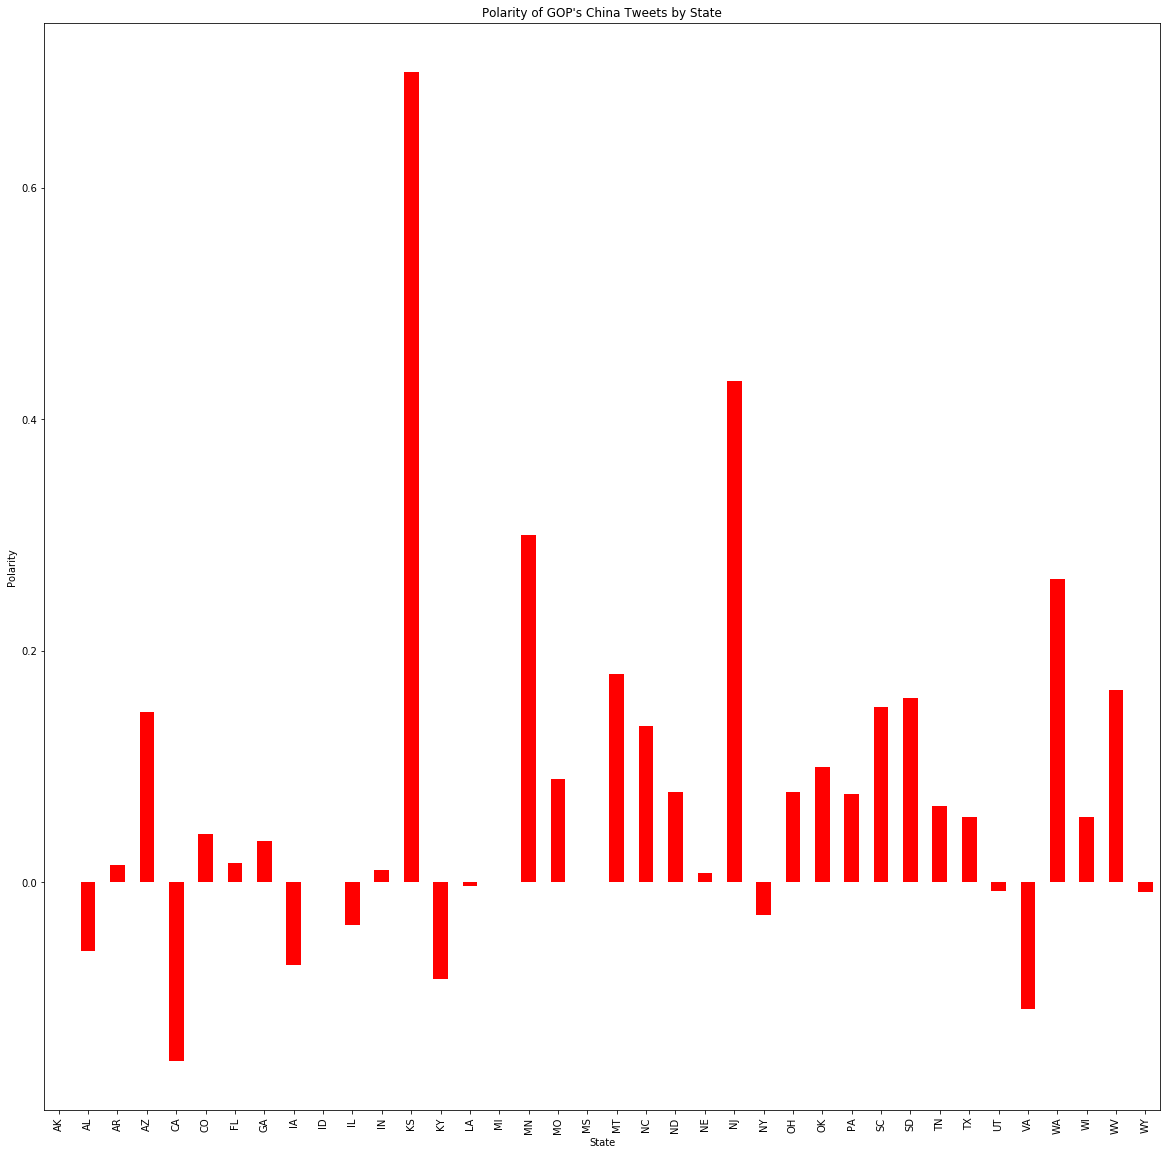

In [7]:
oldgop = republicans.groupby("state").mean()
gop = oldgop.reset_index()

gop_polarity = gop.plot(kind='bar', x='state', y="Polarity", figsize = (20, 20), legend = None, color = 'r', title = "Polarity of GOP's China Tweets by State")
gop_polarity.set_xlabel("State")
gop_polarity.set_ylabel("Polarity")

Text(0, 0.5, 'Polarity')

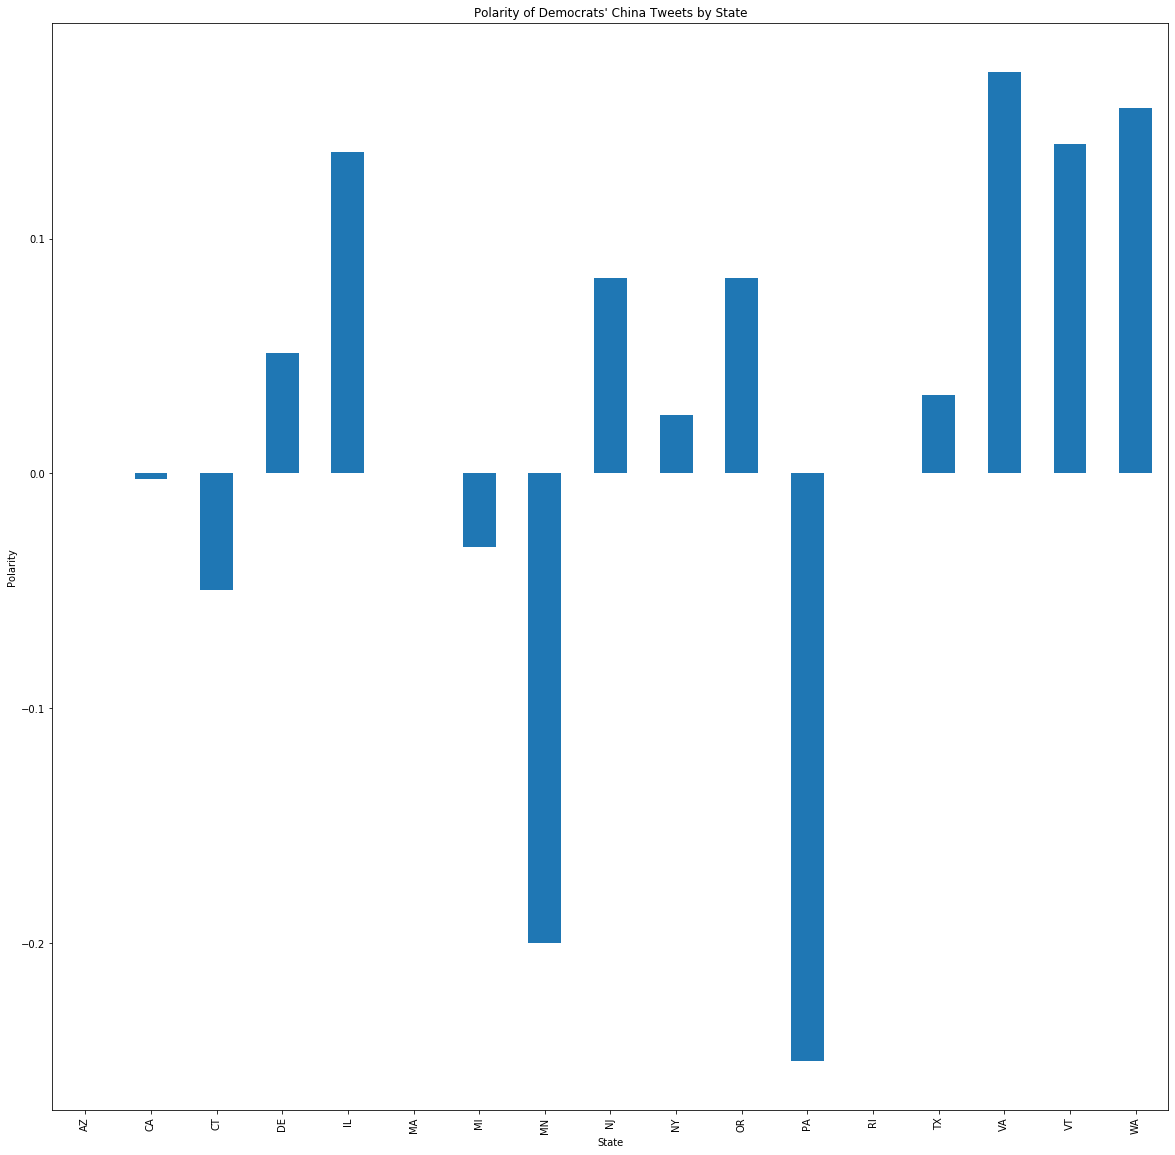

In [8]:
olddem = democrats.groupby("state").mean()
dem = olddem.reset_index()

dem_polarity = dem.plot(kind='bar', x='state', y="Polarity", figsize = (20, 20), legend = None, title = "Polarity of Democrats' China Tweets by State")
dem_polarity.set_xlabel("State")
dem_polarity.set_ylabel("Polarity")

In [9]:
cases_by_state = pd.read_csv("cases_by_state.csv")

In [20]:
#setting index to state names

cases_by_state2 = cases_by_state.set_index("state")
cases_by_state2

,Case
state,
AL,5079
AK,321
AZ,5068
AR,1973
CA,33686
CO,9730
CT,19815
DE,2745
DC,2927


In [36]:
#Making a list of states to drop (we're dropping some states because there are no tweets in that state so doesn't
#make much sense to analyze them)

states_to_drop = []

for state in cases_by_state2.index:
    if state not in by_state.index:
        states_to_drop.append(state)
        
states_to_drop

['DC', 'HI', 'ME', 'MD', 'NV', 'NH', 'NM']

In [39]:
#Now making a new list that has all of those states removed

cases_by_state_culled = cases_by_state2.drop(states_to_drop)
cases_by_state_culled

,Case
state,
AL,5079
AK,321
AZ,5068
AR,1973
CA,33686
CO,9730
CT,19815
DE,2745
FL,27059


In [45]:
#now we're adding the number of cases up to 4/20 to the by_state dataframe

by_state["Cases"] = cases_by_state_culled["Case"]

In [46]:
by_state

,district,classSenate,2016presidentClinton,2016presidentTrump,2012presidentObama,2012presidentObama.1,2008presidentObama,2008presidentMccain,2018senateDem,2018senateRep,...,censusTotalPopulation,censusWhitePopulation,censusBlackPopulation,censusLatinoPopulation,censusAsianPacificIslanderPopulation,censusNavtiveAmericanPopulation,censusOtherPopulation,Polarity,Subjectivity,Cases
state,,,,,,,,,,,,,,,,,,,,,
AK,NaN,2.0,36.550871,51.281512,40.812659,54.801577,37.889374,59.424520,NaN,NaN,...,7.085700e+05,4.548310e+05,21862.000000,3.903800e+04,44357.000000,102124.000000,46358.000000,0.000000,0.066667,321
AL,4.500000,NaN,26.802784,70.285104,30.072070,68.821678,30.878005,68.142520,NaN,NaN,...,6.819462e+05,5.238358e+05,105754.250000,3.068750e+04,8289.750000,3479.500000,9899.500000,-0.059524,0.303571,5079
AR,1.500000,2.0,35.164579,59.313255,38.707858,58.762848,40.775542,56.820441,NaN,NaN,...,1.457958e+06,1.082512e+06,244713.000000,8.046667e+04,18464.333333,8713.666667,23088.333333,0.015311,0.237724,1973
AZ,6.500000,3.0,40.052045,53.991082,39.602039,58.542063,41.049407,57.633075,NaN,NaN,...,1.846583e+06,1.136410e+06,66394.200000,4.927030e+05,54983.800000,59756.200000,36335.600000,0.118000,0.325000,5068
CA,18.769231,NaN,61.830137,32.410610,60.652829,36.837507,59.896154,36.669231,NaN,NaN,...,7.027328e+05,3.111595e+05,40653.692308,1.956393e+05,129401.230769,3367.307692,22511.769231,-0.037483,0.339101,33686
CO,4.000000,2.0,38.921474,52.448612,43.685889,53.875120,45.937388,52.433153,NaN,NaN,...,1.796212e+06,1.274514e+06,60106.750000,3.663252e+05,44417.500000,12211.250000,38636.500000,0.041815,0.308879,9730
CT,4.000000,3.0,57.066086,38.741448,56.565351,42.374563,60.091804,38.979602,NaN,NaN,...,2.145637e+06,1.505884e+06,207451.000000,3.017160e+05,84157.500000,3810.000000,42618.500000,-0.049405,0.522024,19815
DE,NaN,1.5,53.085977,41.712745,58.606352,39.979610,61.912044,36.928767,59.953060,37.818540,...,8.979340e+05,5.867520e+05,186782.000000,7.322100e+04,28546.000000,2824.000000,19809.000000,0.051136,0.281818,2745
FL,10.250000,2.0,39.323103,57.274481,42.520378,56.315373,44.841267,54.029828,49.932473,50.054976,...,4.317130e+06,2.589036e+06,629912.700000,9.078510e+05,101223.300000,11345.600000,77760.700000,0.017062,0.393166,27059


In [64]:
#Made a separate dataframe without NY because it's such an outlier in cases that it makes it hard to see trends

without_ny = by_state.drop("NY")
without_ks_ny = without_ny.drop("KS")
without_outliers = without_ks_ny.drop("CA")

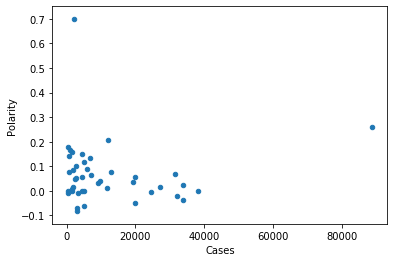

In [65]:
scatter = without_ny.plot.scatter("Cases","Polarity")

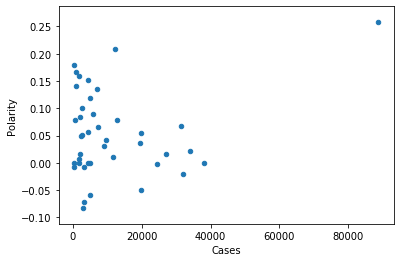

In [66]:
scatter = without_outliers.plot.scatter("Cases","Polarity")

In [53]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


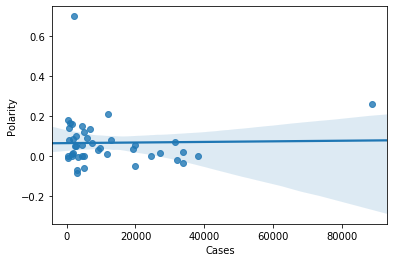

In [60]:
sns.regplot(x="Cases", y="Polarity", data=without_ny)

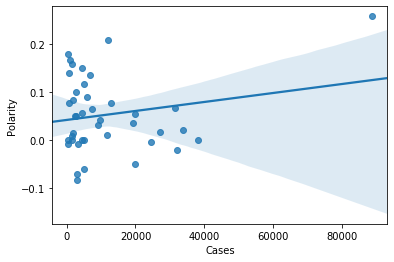

In [67]:
sns.regplot(x="Cases", y="Polarity", data=without_outliers)

In [68]:
China_Data_Frame["Census Percent Asian"] = China_Data_Frame["censusAsianPacificIslanderPopulation"] / China_Data_Frame["censusTotalPopulation"]

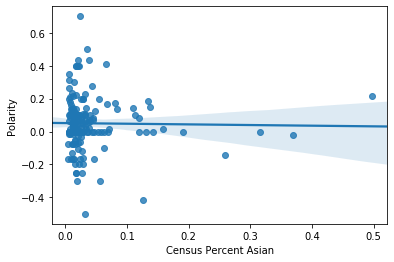

In [69]:
sns.regplot(x="Census Percent Asian", y="Polarity", data=China_Data_Frame)